# Open and manipulate the csv from HMC Survey

### Extracted information on: <br>
  ###  - Center<br>
   ### - Familiarity with FAIR<br>
   ### - Use of Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Declare file name and use panda for loading the csv file

In [2]:
path="/home/luigia/Documents/"

In [3]:
print(path)

/home/luigia/Documents/


In [4]:
filename="HMC_survey_mod.csv"

In [5]:
file_to_use=path+filename

In [6]:
df=pd.read_csv(file_to_use)

In [7]:
df

,id. Response ID,submitdate. Date submitted,lastpage. Last page,startlanguage. Start language,seed. Seed,PERBG1. Which Helmholtz center do you typically work in?,PERBG1[other]. Which Helmholtz center do you typically work in? [Other],PERBG2. Please select the Helmholtz research field you associate yourself with.,PERBG3. Please select your principle research area.,PERBG3[other]. Please select your principle research area. [Other],...,DTPUB7Time. Question time: DTPUB7,RDMPR4Time. Question time: RDMPR4,RDMPR5Time. Question time: RDMPR5,RDMPR6Time. Question time: RDMPR6,RDMPR12Time. Question time: RDMPR12,RDMPR11Time. Question time: RDMPR11,groupTime210. Group time: Services,SERVC1Time. Question time: SERVC1,SERVC2Time. Question time: SERVC2,SERVC3Time. Question time: SERVC3
0,1,NaN,1,de,370885046,Helmholtz Centre for Heavy Ion Research (GSI),NaN,Matter,Chemistry,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1,de,179248756,Helmholtz Centre for Heavy Ion Research (GSI),NaN,Matter,Physics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1/1/1980 0:00,5,de,754353933,Deutsches Elektronen-Synchrotron (DESY),NaN,Matter,Physics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3432.0,NaN,NaN,NaN
3,6,1/1/1980 0:00,5,de,1424516290,Deutsches Elektronen-Synchrotron (DESY),NaN,Matter,Physics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16353.0,NaN,NaN,NaN
4,5,NaN,2,de,1839941698,Helmholtz Centre for Heavy Ion Research (GSI),NaN,Matter,Physics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,218,NaN,0,en,1157684680,NaN,NaN,Matter,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,128,1/1/1980 0:00,5,de,1380236318,Other,Helmholtz Institut Mainz,Matter,Physics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6703.0,NaN,NaN,NaN
214,220,NaN,3,de,1114240336,Helmholtz-Zentrum Berlin für Materialien und E...,NaN,Matter,Physics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,221,NaN,0,en,996383267,NaN,NaN,Matter,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can parse the content focusing on specific columns

We take the one with the info on the center

For instance let's have a look at the centers distribution (column 6)

In [8]:
center=df.iloc[:,5]

In [9]:
print(center)

0          Helmholtz Centre for Heavy Ion Research (GSI)
1          Helmholtz Centre for Heavy Ion Research (GSI)
2                Deutsches Elektronen-Synchrotron (DESY)
3                Deutsches Elektronen-Synchrotron (DESY)
4          Helmholtz Centre for Heavy Ion Research (GSI)
                             ...                        
212                                                  NaN
213                                                Other
214    Helmholtz-Zentrum Berlin für Materialien und E...
215                                                  NaN
216                                                  NaN
Name: PERBG1. Which Helmholtz center do you typically work in? , Length: 217, dtype: object


Remove the NaN and create strings for the histogram labels

In [10]:
center1=center.notna()

In [11]:
len(center1)

217

Redifine the columns content shortening the content if different from NaN

Initialize a new array of strings


loop over the entries

In [12]:
newstr=[];
#newstr=pd.DataFrame([])
for ind in range(len((center))):
      #%  print(center[ind],ind,len(str(center[ind])))
        if len(str(center[ind]))<=3:
            newstrtmp='NaN'
        if str(center[ind])=='Other':
            newstrtmp='Otr'
        if len(str(center[ind]))>3 and center[ind]!= "Other":
            if str(center[ind])=="Helmholtz-Zentrum Hereon":
                   newstrtmp='Here'
            if str(center[ind])!="Helmholtz-Zentrum Hereon":
                   newstrtmp=str(str(center[ind]).split('(')[1].split(')')[0].strip())
        #print(newstrtmp,len(newstrtmp),ind)
        newstr.append((newstrtmp))
#print(newstr)
                
                


In [13]:
len(newstr)

217

In [14]:
dfnew=pd.DataFrame(newstr,dtype='object',columns=['center names'])

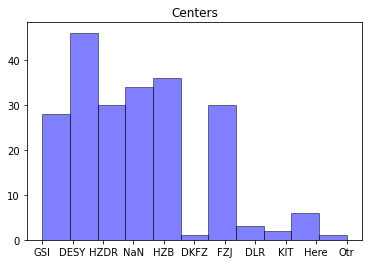

In [15]:
plt.title('Centers')
(n,bins,patches)=plt.hist(dfnew,11,facecolor='blue',alpha=0.5,edgecolor='black')

extract other parameters from the csv file of the survey

In [16]:
extr2=df.iloc[:,30:40]
extr2

,PERBG4. How many years have you been working in research?,PERBG6. Which is your current career level?,PERBG6[other]. Which is your current career level? [Other],PERBG7. Do you have an ORCID iD?,PERBG8. How familiar are you with the FAIR data guidelines?,RSDP1[3A4]. Please characterize the origin of your research data. [|I generate the data by myself.|I typically reuse data collected by others.],RSDP1[1A2]. Please characterize the origin of your research data. [|Measurements and observations|Simulations and models],"RSDP1b[1]. Which amount of your data sets was recorded at large scale facilities (e.g., LHC, PETRA III, BESSY II, KATRIN, ELBE)? (Percentage) [|0%|100%]",RSDP1c[1]. Please specify the large scale facility used: [LHC],RSDP1c[2]. Please specify the large scale facility used: [PETRA III ]
0,More than 10 years,Principal Investigator,NaN,Yes,familiar,NaN,NaN,NaN,NaN,NaN
1,More than 10 years,Director (of the institute),NaN,Yes,familiar,NaN,NaN,NaN,NaN,NaN
2,More than 10 years,Principal Investigator,NaN,Yes,apply,3.0,3.0,95.0,No,No
3,More than 10 years,Research associate,NaN,No,apply,NaN,4.0,80.0,No,No
4,More than 10 years,Principal Investigator,NaN,NaN,familiar,2.0,2.0,100.0,No,No
...,...,...,...,...,...,...,...,...,...,...
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,4 to 6 years,PhD student,NaN,No,new,1.0,4.0,0.0,NaN,NaN
214,1 to 3 years,PhD student,NaN,No,new,1.0,1.0,100.0,No,No
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Parse to isolate the information on professional role, orcid, fair knowledge

In [17]:
years=df.iloc[:,30]
role=df.iloc[:,31]
orcid=df.iloc[:,33]
fair=df.iloc[:,34]
#print(years,role,orcid,fair)
cols=[30,31,33,34];
extr_fair_prof=df[df.columns[cols]]

In [18]:
extr_fair_prof

,PERBG4. How many years have you been working in research?,PERBG6. Which is your current career level?,PERBG7. Do you have an ORCID iD?,PERBG8. How familiar are you with the FAIR data guidelines?
0,More than 10 years,Principal Investigator,Yes,familiar
1,More than 10 years,Director (of the institute),Yes,familiar
2,More than 10 years,Principal Investigator,Yes,apply
3,More than 10 years,Research associate,No,apply
4,More than 10 years,Principal Investigator,NaN,familiar
...,...,...,...,...
212,NaN,NaN,NaN,NaN
213,4 to 6 years,PhD student,No,new
214,1 to 3 years,PhD student,No,new
215,NaN,NaN,NaN,NaN


### Knowledge of FAIR Principles and their implementation

In [19]:
fair=df[df.columns[34]]

<AxesSubplot:>

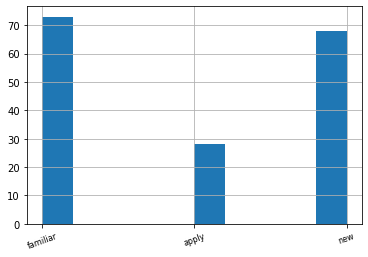

In [20]:
fair.hist(xrot=20,xlabelsize=8)

### Scientific position held at the moment

In [21]:
cols=[31];
position=df[df.columns[31]]

<AxesSubplot:>

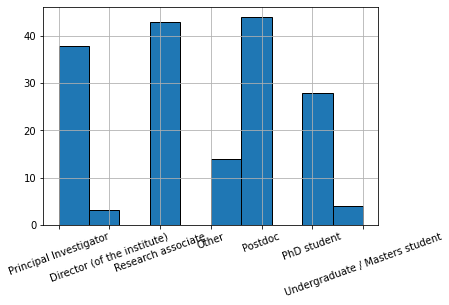

In [22]:
position.hist(xrot=20,edgecolor='black')

### About having an **ORCID**

In [23]:
cols=[33];
orcid=df[df.columns[cols]]

In [24]:
orcid

,PERBG7. Do you have an ORCID iD?
0,Yes
1,Yes
2,Yes
3,No
4,NaN
...,...
212,NaN
213,No
214,No
215,NaN


In [25]:
orcid.hist()

ValueError: hist method requires numerical or datetime columns, nothing to plot.

2D histograms

In [26]:
position

0           Principal Investigator
1      Director (of the institute)
2           Principal Investigator
3               Research associate
4           Principal Investigator
                  ...             
212                            NaN
213                    PhD student
214                    PhD student
215                            NaN
216                            NaN
Name: PERBG6. Which is your current career level?, Length: 217, dtype: object

In [27]:
import seaborn as sns
import pandas as pd


In [28]:
x=position
y=fair

In [29]:
df.iloc[1:]

,id. Response ID,submitdate. Date submitted,lastpage. Last page,startlanguage. Start language,seed. Seed,PERBG1. Which Helmholtz center do you typically work in?,PERBG1[other]. Which Helmholtz center do you typically work in? [Other],PERBG2. Please select the Helmholtz research field you associate yourself with.,PERBG3. Please select your principle research area.,PERBG3[other]. Please select your principle research area. [Other],...,DTPUB7Time. Question time: DTPUB7,RDMPR4Time. Question time: RDMPR4,RDMPR5Time. Question time: RDMPR5,RDMPR6Time. Question time: RDMPR6,RDMPR12Time. Question time: RDMPR12,RDMPR11Time. Question time: RDMPR11,groupTime210. Group time: Services,SERVC1Time. Question time: SERVC1,SERVC2Time. Question time: SERVC2,SERVC3Time. Question time: SERVC3
1,2,NaN,1,de,179248756,Helmholtz Centre for Heavy Ion Research (GSI),NaN,Matter,Physics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1/1/1980 0:00,5,de,754353933,Deutsches Elektronen-Synchrotron (DESY),NaN,Matter,Physics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3432.0,NaN,NaN,NaN
3,6,1/1/1980 0:00,5,de,1424516290,Deutsches Elektronen-Synchrotron (DESY),NaN,Matter,Physics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16353.0,NaN,NaN,NaN
4,5,NaN,2,de,1839941698,Helmholtz Centre for Heavy Ion Research (GSI),NaN,Matter,Physics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,14,1/1/1980 0:00,5,de,897920213,Deutsches Elektronen-Synchrotron (DESY),NaN,Matter,Psychology,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1732.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,218,NaN,0,en,1157684680,NaN,NaN,Matter,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,128,1/1/1980 0:00,5,de,1380236318,Other,Helmholtz Institut Mainz,Matter,Physics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6703.0,NaN,NaN,NaN
214,220,NaN,3,de,1114240336,Helmholtz-Zentrum Berlin für Materialien und E...,NaN,Matter,Physics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,221,NaN,0,en,996383267,NaN,NaN,Matter,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
colnames=df.columns
print(colnames[30:36])

Index(['PERBG4. How many years have you been working in research?',
       'PERBG6. Which is your current career level?',
       'PERBG6[other]. Which is your current career level? [Other]',
       'PERBG7. Do you have an ORCID iD?',
       'PERBG8. How familiar are you with the FAIR data guidelines?',
       'RSDP1[3A4]. Please characterize the origin of your research data. [|I generate the data by myself.|I typically reuse data collected by others.]'],
      dtype='object')


In [31]:
xcol='PERBG6. Which is your current career level?'
ycol='PERBG8. How familiar are you with the FAIR data guidelines?'

In [32]:
dflast=pd.DataFrame(position,fair)

In [33]:
#ax=sns.histplot(data=df,cbar='True')

## Correlation FAIR knowledge -Professional degree

In [34]:
!ax=sns.histplot(x=$xcol, y=$ycol,data=df,cbar=True)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `ax=sns.histplot(x=PERBG6. Which is your current career level?, y=PERBG8. How familiar are you with the FAIR data guidelines?,data=df,cbar=True)'


In [35]:
sns.set(font_scale=1)

In [36]:
plt.figure(figsize=(20,16))

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

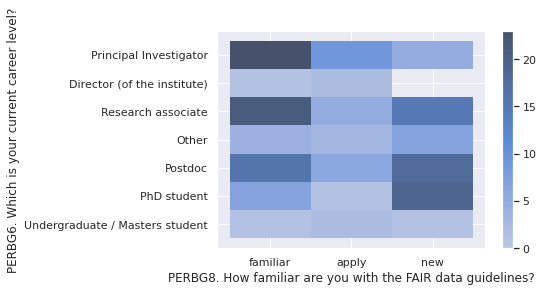

In [37]:
ax=sns.histplot(x='PERBG8. How familiar are you with the FAIR data guidelines?',y='PERBG6. Which is your current career level?',data=df,cbar=True)


TypeError: '<=' not supported between instances of 'float' and 'str'

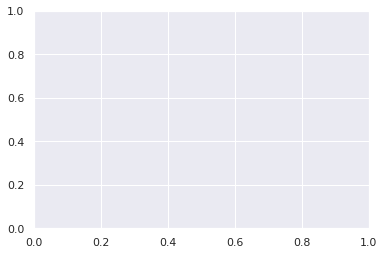

In [38]:
plt.hist2d(df.iloc[:,1],df.iloc[:,2])
#,df["PERBG6. Which is your current career level?"])

In [42]:
plt.show()

Let's look how many use `Python`

This information is saved in the survey at column

In [39]:
dfsoft=df.iloc[:,91:93]

In [40]:
dfsoft

,RDMPR10[1]. Please name the three most important software applications that you use for your research. [Software 1],RDMPR10[2]. Please name the three most important software applications that you use for your research. [Software 2]
0,NaN,NaN
1,NaN,NaN
2,Eventdisplay (software for gamma-ray observato...,ROOT analysis software
3,openQCD,proprietary C-codes
4,origin,labview
...,...,...
212,NaN,NaN
213,Geant4,ROOT
214,Python,Matlab
215,NaN,NaN


In [41]:
dfsoft2=df.iloc[:,92].str.contains('python',case=True)

In [42]:
dfsoft2

0        NaN
1        NaN
2      False
3      False
4      False
       ...  
212      NaN
213    False
214    False
215      NaN
216      NaN
Name: RDMPR10[2]. Please name the three most important software applications that you use for your research. [Software 2], Length: 217, dtype: object

In [43]:
df.iloc[:,91].str.count("py|Py").sum()

28.0

In [44]:
df.iloc[:,92].str.count("py|Py").sum()

18.0

In [45]:
df.iloc[:,93].str.count("py|Py").sum()

16.0

## In which center the FAIR principles are mostly applied
## Where some extensive training on FAIR data curation is needed ?

Let's select this information from the HMC survey

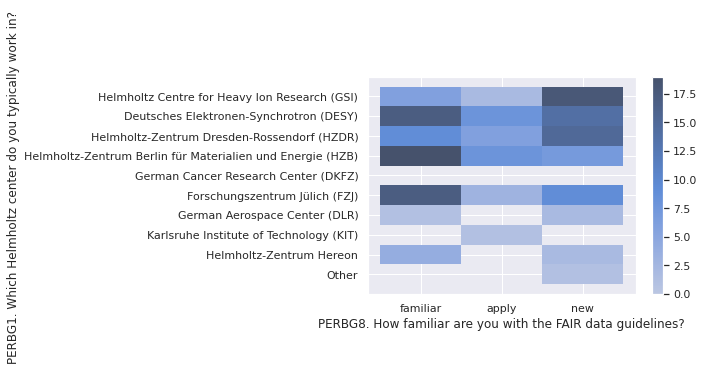

In [58]:
ax=sns.histplot(x='PERBG8. How familiar are you with the FAIR data guidelines?',y='PERBG1. Which Helmholtz center do you typically work in? ',data=df,cbar=True)


In [54]:
df.iloc[:,6]

0                           NaN
1                           NaN
2                           NaN
3                           NaN
4                           NaN
                 ...           
212                         NaN
213    Helmholtz Institut Mainz
214                         NaN
215                         NaN
216                         NaN
Name: PERBG1[other]. Which Helmholtz center do you typically work in?  [Other], Length: 217, dtype: object

In [54]:
df.iloc[:,6]

0                           NaN
1                           NaN
2                           NaN
3                           NaN
4                           NaN
                 ...           
212                         NaN
213    Helmholtz Institut Mainz
214                         NaN
215                         NaN
216                         NaN
Name: PERBG1[other]. Which Helmholtz center do you typically work in?  [Other], Length: 217, dtype: object

In [65]:
colnames=df.columns
print(colnames[91:93])

Index(['RDMPR10[1]. Please name the three most important software applications that you use for your research. [Software 1]', 'RDMPR10[2]. Please name the three most important software applications that you use for your research. [Software 2]'], dtype='object')


In [ ]:
import seaborn

In [54]:
df.iloc[:,6]

0                           NaN
1                           NaN
2                           NaN
3                           NaN
4                           NaN
                 ...           
212                         NaN
213    Helmholtz Institut Mainz
214                         NaN
215                         NaN
216                         NaN
Name: PERBG1[other]. Which Helmholtz center do you typically work in?  [Other], Length: 217, dtype: object

In [56]:
colnames=df.columns
print(colnames[1:6])

Index(['submitdate. Date submitted', 'lastpage. Last page',
       'startlanguage. Start language', 'seed. Seed',
       'PERBG1. Which Helmholtz center do you typically work in? '],
      dtype='object')
